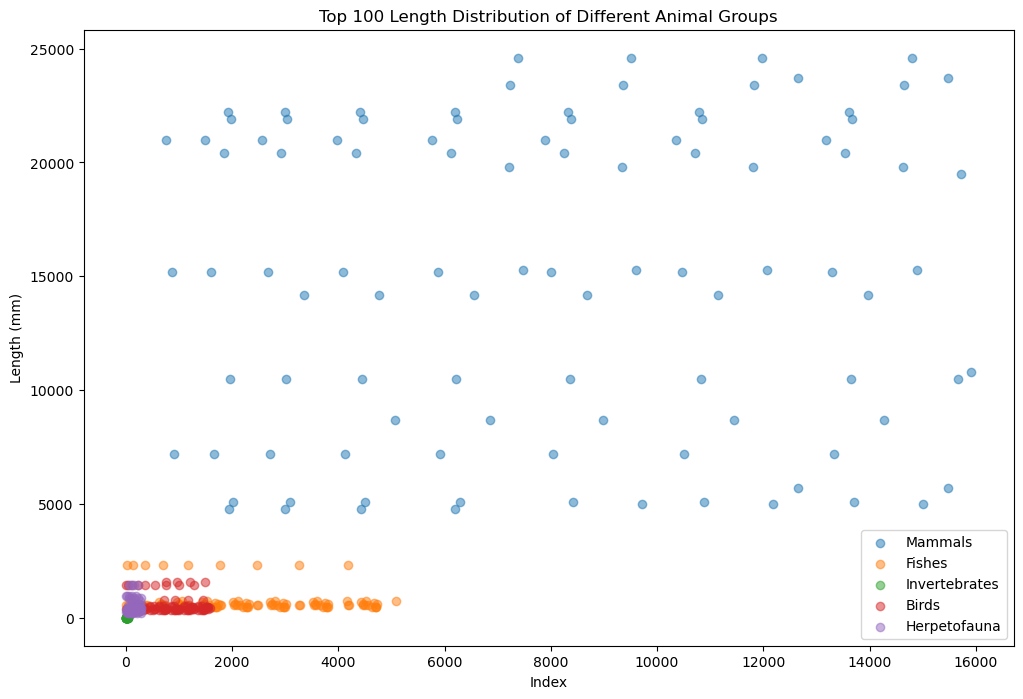

In [3]:
import pandas as pd

# import the following jsons and visualize their respective length columns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the JSON files into DataFrames
mammals_df = pd.read_json('mammals_10k_rand_1_norm.json')
fishes_df = pd.read_json('fishes_10k_rand_1_norm.json')
inv_df = pd.read_json('inv_10k_rand_1_norm.json')
birds_df = pd.read_json('birds_10k_rand_1_norm.json')
herp_df = pd.read_json('herp_10k_rand_1_norm.json')

# Select the 100 longest lengths from each DataFrame
mammals_top100 = mammals_df.nlargest(100, 'length_mm')
fishes_top100 = fishes_df.nlargest(100, 'length_mm')
inv_top100 = inv_df.nlargest(100, 'length_mm')
birds_top100 = birds_df.nlargest(100, 'length_mm')
herp_top100 = herp_df.nlargest(100, 'length_mm')

# Plot the length columns as scatter plots
plt.figure(figsize=(12, 8))

plt.scatter(mammals_top100.index, mammals_top100['length_mm'], alpha=0.5, label='Mammals')
plt.scatter(fishes_top100.index, fishes_top100['length_mm'], alpha=0.5, label='Fishes')
plt.scatter(inv_top100.index, inv_top100['length_mm'], alpha=0.5, label='Invertebrates')
plt.scatter(birds_top100.index, birds_top100['length_mm'], alpha=0.5, label='Birds')
plt.scatter(herp_top100.index, herp_top100['length_mm'], alpha=0.5, label='Herpetofauna')

plt.xlabel('Index')
plt.ylabel('Length (mm)')
plt.title('Top 100 Length Distribution of Different Animal Groups')
plt.legend()
plt.show()

# Combine the top 100 lengths from each DataFrame into a single DataFrame
combined_df = pd.concat([
    mammals_top100.assign(Group='Mammals'),
    fishes_top100.assign(Group='Fishes'),
    inv_top100.assign(Group='Invertebrates'),
    birds_top100.assign(Group='Birds'),
    herp_top100.assign(Group='Herpetofauna')
])

# Create a tree map
fig = px.treemap(combined_df, path=['Group', 'title'], values='length_mm', 
                 title='Top 100 Length Distribution of Different Animal Groups',
                 color='length_mm', hover_data=['length_mm'])

fig.show()
# import matplotlib.pyplot as plt

# # Select the 100 longest lengths from each DataFrame
# mammals_top100 = mammals_df.nlargest(100, 'length_mm')
# fishes_top100 = fishes_df.nlargest(100, 'length_mm')
# inv_top100 = inv_df.nlargest(100, 'length_mm')
# birds_top100 = birds_df.nlargest(100, 'length_mm')
# herp_top100 = herp_df.nlargest(100, 'length_mm')

# # Plot the length columns as scatter plots
# plt.figure(figsize=(12, 8))

# plt.scatter(mammals_top100.index, mammals_top100['length_mm'], alpha=0.5, label='Mammals')
# plt.scatter(fishes_top100.index, fishes_top100['length_mm'], alpha=0.5, label='Fishes')
# plt.scatter(inv_top100.index, inv_top100['length_mm'], alpha=0.5, label='Invertebrates')
# plt.scatter(birds_top100.index, birds_top100['length_mm'], alpha=0.5, label='Birds')
# plt.scatter(herp_top100.index, herp_top100['length_mm'], alpha=0.5, label='Herpetofauna')

# plt.xlabel('Index')
# plt.ylabel('Length (mm)')
# plt.title('Top 100 Length Distribution of Different Animal Groups')
# plt.legend()
# plt.show()
# # Create a tree chart to visualize the hierarchical structure of the data
# import plotly.express as px

# # Combine the top 100 lengths from each DataFrame into a single DataFrame
# combined_df = pd.concat([
#     mammals_top100.assign(Group='Mammals'),
#     fishes_top100.assign(Group='Fishes'),
#     inv_top100.assign(Group='Invertebrates'),
#     birds_top100.assign(Group='Birds'),
#     herp_top100.assign(Group='Herpetofauna')
# ])

# # Create a tree map
# fig = px.treemap(combined_df, path=['Group', 'title'], values='length_mm', 
#                  title='Top 100 Length Distribution of Different Animal Groups',
#                  color='length_mm', hover_data=['length_mm'])

# fig.show()


In [17]:
# Filter to limit the number of unique values in 'place'
# filtered_df = mammals_df[mammals_df['place'].isin(['United States'])]

# Create the density contour plot
fig = px.density_contour(mammals_df, x="length_mm", y="weight_g", z="length_mm", histfunc="avg",
                         title="Density Contour of Length vs. Weight in Mammals")
fig.show()

In [19]:
import numpy as np

# Filter out records where either length or weight is missing
mammals_filtered = mammals_df.dropna(subset=['length_mm', 'weight_g'])

# Calculate the height (assuming height is the same as length for this example)
mammals_filtered['height_mm'] = mammals_filtered['length_mm']

# Calculate the z-axis value (weight * height)
mammals_filtered['weight_height'] = mammals_filtered['weight_g'] * mammals_filtered['height_mm']

# Apply log scale to length and weight
mammals_filtered['log_weight_g'] = np.log(mammals_filtered['weight_g'])
mammals_filtered['log_length_mm'] = np.log(mammals_filtered['length_mm'])
mammals_filtered['log_weight_height'] = np.log(mammals_filtered['weight_height'])

# Create the 3D scatter plot with log scales
fig = px.scatter_3d(mammals_filtered, x='log_weight_g', y='log_length_mm', z='log_weight_height',
                    color='place', title='3D Scatter Plot of Mammals (Log Scale)')

fig.show()

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_11865/90665365.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_11865/90665365.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_11865/90665365.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [7]:
import pandas as pd

# import the following jsons and visualize their respective length columns
import matplotlib.pyplot as plt
import plotly.express as px

mammals_df = pd.read_json('mammals_10k_rand_1_norm.json')
fishes_df = pd.read_json('fishes_10k_rand_1_norm.json')
inv_df = pd.read_json('inv_10k_rand_1_norm.json')
birds_df = pd.read_json('birds_10k_rand_1_norm.json')
herp_df = pd.read_json('herp_10k_rand_1_norm.json')


# Filter out records where either length or weight is missing for each dataframe
mammals_filtered = mammals_df.dropna(subset=['length_mm', 'weight_g'])
fishes_filtered = fishes_df.dropna(subset=['length_mm', 'weight_g'])
inv_filtered = inv_df.dropna(subset=['length_mm', 'weight_g'])
birds_filtered = birds_df.dropna(subset=['length_mm', 'weight_g'])
herp_filtered = herp_df.dropna(subset=['length_mm', 'weight_g'])

# Add a category column to each dataframe
mammals_filtered['Category'] = 'Mammals'
fishes_filtered['Category'] = 'Fishes'
inv_filtered['Category'] = 'Invertebrates'
birds_filtered['Category'] = 'Birds'
herp_filtered['Category'] = 'Herpetofauna'

# Combine the filtered dataframes into a single dataframe
combined_filtered_df = pd.concat([mammals_filtered, fishes_filtered, inv_filtered, birds_filtered, herp_filtered])

# Create the scatter plot using Plotly Express
fig = px.scatter(combined_filtered_df, x="length_mm", y="weight_g",
                 color="Category", hover_name="title",
                 title="Weight vs Length by Natural Science Category")

fig.show()

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_12316/3272847676.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_12316/3272847676.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_12316/3272847676.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [26]:
# Filter out rows with missing values in either weight or length
mammals_filtered = mammals_df.dropna(subset=['weight_g', 'length_mm'])

# Create the scatter plot using Plotly Express
fig = px.scatter(mammals_filtered, x="length_mm", y="weight_g", title="Mammals Weight vs Length")
fig.show()